# Python e Finanças

### Uma das grandes aplicações do Python é para Finanças/Mercado Financeiro

### Não é bem uma integração, pois usaremos bibliotecas que já conhecemos, só que aplicadas a ativos financeiros

1. pandas
2. matplotlib
3. numpy

Essas são as 3 principais bibliotecas usadas. Então essencialmente é uma aplicação de tudo o que aprendemos nessas 3 bibliotecas.

Vamos instalar também o pandas_datareader para puxar cotações diretamente do yahoo finance. Use o pip para isso.

### Vamos analisar o IBOV

In [1]:
# Biblioteca para trabalhar com manipulação de dados
import pandas as pd
# Biblioteca de graficos
import matplotlib.pyplot as plt
# Biblioteca para trabalahr com matrizes e matemática
import numpy as np
# biblioteca de finanças
import pandas_datareader.data as web

#========================================================
# Pegando a cotação do Ibovespa
cotacao_ibov = web.DataReader('^BVSP', 
                              # Fonte dos dadso
                              data_source='yahoo',
                              # Inicio da serie
                              start = '2020-01-01',
                              # Fim da series
                              end = '2020-11-10')
# Vizualizando o DataFrame
display(cotacao_ibov)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,118573,115649,115652,118573,5162700,118573
2020-01-03,118792,117341,118564,117707,6834500,117707
2020-01-06,117707,116269,117707,116878,6570000,116878
2020-01-07,117076,115965,116872,116662,4854100,116662
2020-01-08,117335,115693,116667,116247,5910500,116247
...,...,...,...,...,...,...
2020-11-04,98296,95987,95992,97811,10704600,97811
2020-11-05,100922,97872,97873,100774,10455300,100774
2020-11-06,100928,99837,100751,100799,8382800,100799


### Analisando o Gráfico

Text(0, 0.5, 'Cotação')

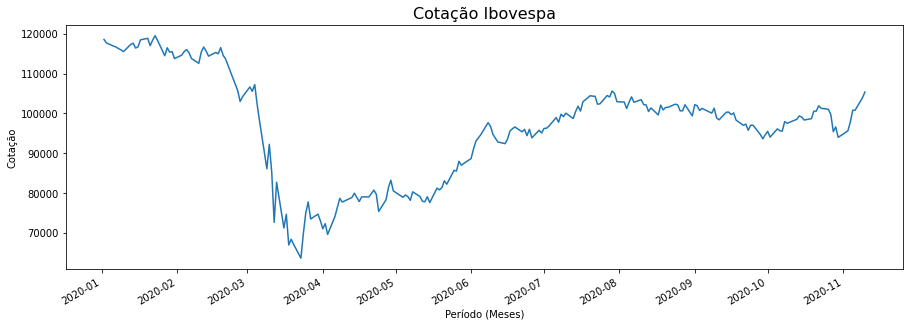

In [10]:
# Vizualizando a series temporal
# tamanho do grafico é 15 de largula e 5 de altura
cotacao_ibov['Adj Close'].plot(figsize = (15, 5));
plt.title('Cotação Ibovespa', size = 16)
plt.xlabel('Período (Meses)')
plt.ylabel('Cotação')

### Retorno do IBOV

In [11]:
retorno_ibov =cotacao_ibov['Adj Close'][-1] / cotacao_ibov['Adj Close'][0] - 1
print('Retorno IBOV: {:.2%}'.format(retorno_ibov))

Retorno IBOV: -11.15%


### Analisando com Média Móvel

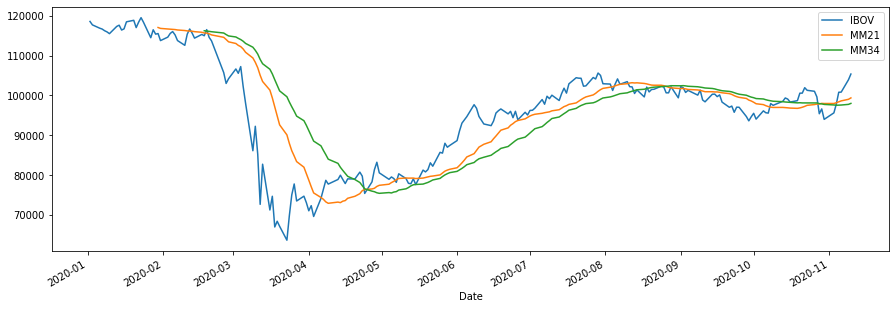

In [17]:
cotacao_ibov['Adj Close'].plot(figsize = (15, 5), label = 'IBOV' );
# Média móvel de 21 dias
cotacao_ibov['Adj Close'].rolling(21).mean().plot(label = 'MM21')
cotacao_ibov['Adj Close'].rolling(34).mean().plot(label = 'MM34')
# Mostrando a legenda
plt.legend()
plt.show()

In [20]:
from IPython.display import display
import finplot as fplt

fplt.candlestick_ochl(cotacao_ibov[['Open', 'Close', 'High', 'Low']])
fplt.plot(cotacao_ibov['Adj Close'])
fplt.show()